In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%time
df = pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/pico_placa_ago_sep_HF.csv', sep=";")
df_tipo_dia = pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/Tipodia_HF.csv', sep=";")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs


In [4]:
df.head()

,Jornada,Corredor,tid,Tramo,Sentido,Volumen,Fecha,Velocidad
0,PM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,325,2020-08-03,43.878331
1,AM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,168,2020-08-03,47.911996
2,PM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,264,2020-08-03,47.506835
3,AM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,202,2020-08-03,52.084691
4,PM,Autopista Norte,1002021,AUTONORTE - CARDIO.INFANTILCL146,NS,253,2020-08-03,50.053515


In [5]:
df_tipo_dia.head()

,Fecha,Nombredia,Tipodia
0,2020-08-01,Sabado,Festivo
1,2020-08-02,Domingo,Festivo
2,2020-08-03,Lunes,Habil
3,2020-08-04,Martes,Habil
4,2020-08-05,Miercoles,Habil


In [6]:
dfM = df.merge(df_tipo_dia, left_on='Fecha', right_on='Fecha')
dfM.head()

,Jornada,Corredor,tid,Tramo,Sentido,Volumen,Fecha,Velocidad,Nombredia,Tipodia
0,PM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,325,2020-08-03,43.878331,Lunes,Habil
1,AM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,168,2020-08-03,47.911996,Lunes,Habil
2,PM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,264,2020-08-03,47.506835,Lunes,Habil
3,AM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,202,2020-08-03,52.084691,Lunes,Habil
4,PM,Autopista Norte,1002021,AUTONORTE - CARDIO.INFANTILCL146,NS,253,2020-08-03,50.053515,Lunes,Habil


In [7]:
dfF = dfM.loc[dfM["Tipodia"] == 'Habil']
dfF_ = dfF.loc[dfF["Fecha"] > '2020-09-21']
dfF = dfF.loc[dfF["Fecha"] < '2020-09-22']
dfF.head()

,Jornada,Corredor,tid,Tramo,Sentido,Volumen,Fecha,Velocidad,Nombredia,Tipodia
0,PM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,325,2020-08-03,43.878331,Lunes,Habil
1,AM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,168,2020-08-03,47.911996,Lunes,Habil
2,PM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,264,2020-08-03,47.506835,Lunes,Habil
3,AM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,202,2020-08-03,52.084691,Lunes,Habil
4,PM,Autopista Norte,1002021,AUTONORTE - CARDIO.INFANTILCL146,NS,253,2020-08-03,50.053515,Lunes,Habil


In [8]:
dfF["Fecha"] = dfF["Fecha"].astype("datetime64")
dfF["Velocidad"] = dfF["Velocidad"].astype("float64")
dfF["Jornada"] = dfF["Jornada"].astype("str")
dfF.dtypes

Jornada              object
Corredor             object
tid                   int64
Tramo                object
Sentido              object
Volumen               int64
Fecha        datetime64[ns]
Velocidad           float64
Nombredia            object
Tipodia              object
dtype: object

In [9]:
df2 = dfF.groupby("Fecha", as_index=False).mean()["Velocidad"]
df2

0     31.178677
1     30.987343
2     30.874177
3     30.604460
4     30.042883
5     30.053818
6     29.753575
7     30.123611
8     29.749653
9     29.176304
10    29.718267
11    29.791044
12    29.442881
13    29.864631
14    29.492109
15    29.630548
16    29.267880
17    28.464992
18    28.618579
19    28.589916
20    27.132550
21    28.408496
22    27.402521
23    28.986277
24    28.278182
25    28.162718
26    26.930070
27    28.164469
28    28.370468
29    28.033944
30    27.196324
31    24.367901
32    26.522457
33    30.161997
Name: Velocidad, dtype: float64

<h1>Polinomial Regression using scikit-learn</h1>

In [10]:
pol_degree = 3
x = df2.index.values.reshape(-1,1)
xSPP = x
y = df2.values
transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
transformer.fit(x)
xp = transformer.transform(x)
model = LinearRegression().fit(xp, y)
print('Coefficient of determination:', model.score(xp, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
y_pred = model.predict(xp)
print('Predicted response:', y_pred, sep='\n')

Coefficient of determination: 0.633093364964607
Intercept: 30.86560923301465
Coefficients: [-0.08527032 -0.00431772  0.00011453]
Predicted response:
[30.86560923 30.77613572 30.67871398 30.57403122 30.46277463 30.34563143
 30.22328881 30.096434   29.96575419 29.83193659 29.69566841 29.55763685
 29.41852912 29.27903242 29.13983396 29.00162096 28.8650806  28.7309001
 28.59976667 28.47236751 28.34938983 28.23152083 28.11944773 28.01385772
 27.91543801 27.82487581 27.74285832 27.67007276 27.60720632 27.55494621
 27.51397965 27.48499383 27.46867596 27.46571325]


In [11]:
model_ols = sm.OLS(y, xp).fit()
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              106.2
Date:                Mon, 09 Nov 2020   Prob (F-statistic):                    2.14e-16
Time:                        02:26:47   Log-Likelihood:                         -121.50
No. Observations:                  34   AIC:                                      249.0
Df Residuals:                      31   BIC:                                      253.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

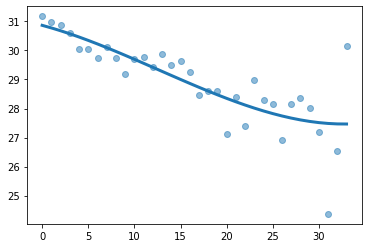

In [12]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred, linewidth=3)
plt.show()

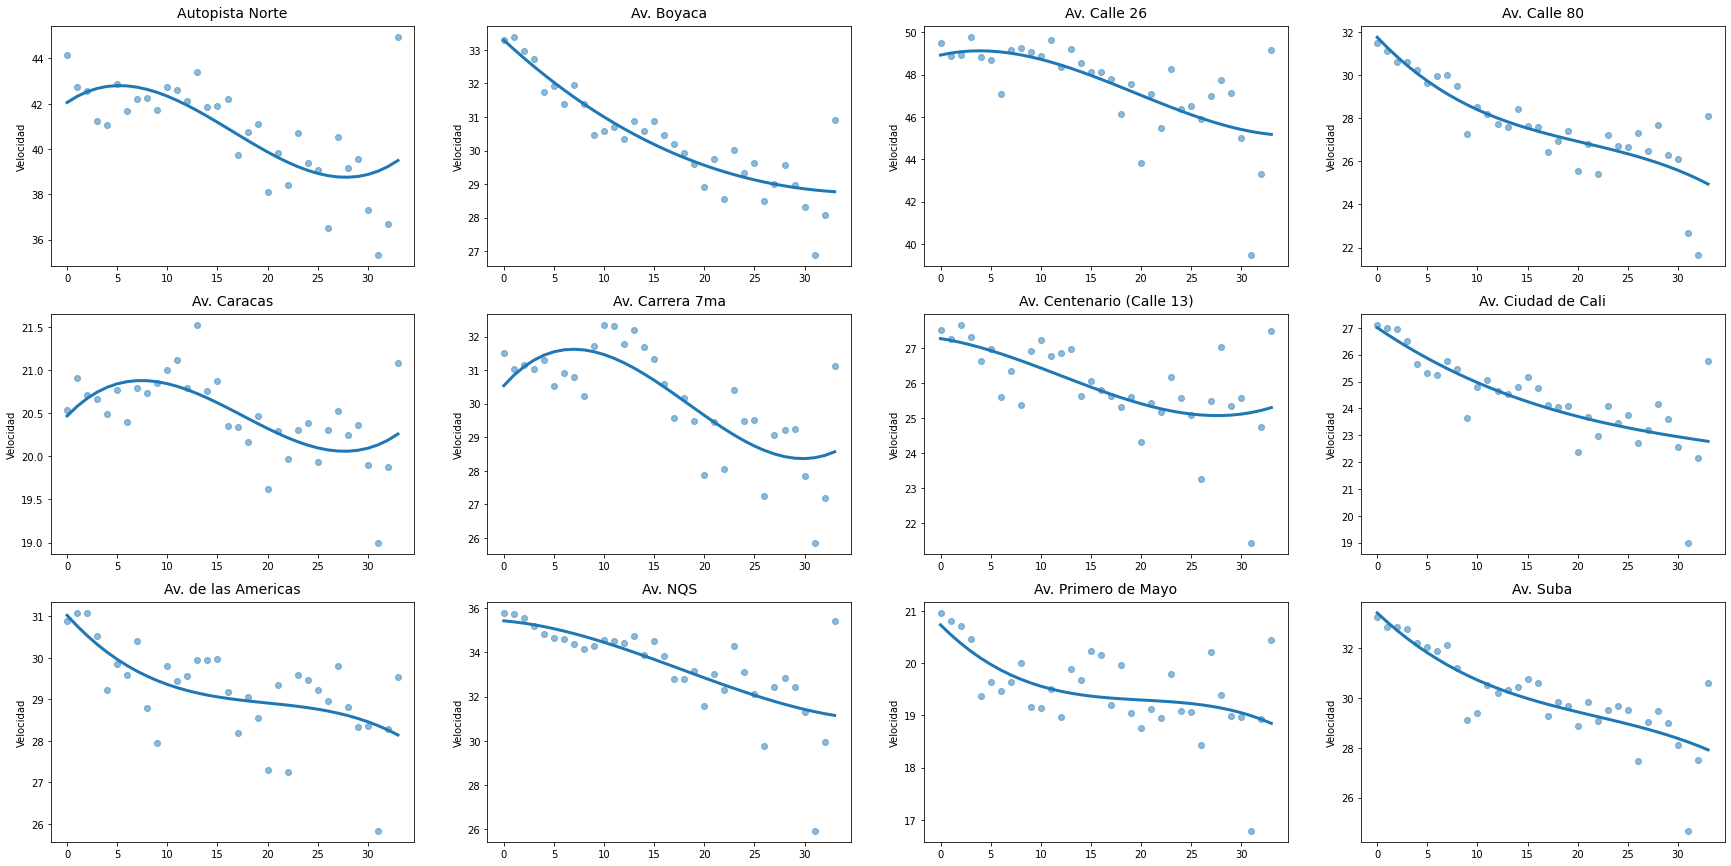

In [13]:
corredor = ["Autopista Norte", "Av. Boyaca", "Av. Calle 26", "Av. Calle 80", "Av. Caracas", "Av. Carrera 7ma", 
            "Av. Centenario (Calle 13)", "Av. Ciudad de Cali", "Av. de las Americas", "Av. NQS", "Av. Primero de Mayo", "Av. Suba"]
plt.figure(figsize=(30,15))
y_predT = []
i = 1
for cor in corredor:
  dfC = dfF.loc[dfF["Corredor"] == cor]
  df2 = dfC.groupby("Fecha", as_index=False).mean()["Velocidad"]
  y = df2.values
  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x[:len(y)])
  xp = transformer.transform(x[:len(y)])
  model = LinearRegression().fit(xp, y)
  y_pred = model.predict(xp)
  y_predT.append(y_pred)
  plt.subplot(3,4,i)
  i = i + 1
  plt.scatter(x[:len(y)], y, alpha=0.5)
  plt.plot(x[:len(y)], y_pred, linewidth=3)
  plt.ylabel("Velocidad");
  plt.title(cor, fontsize=14, verticalalignment='bottom')

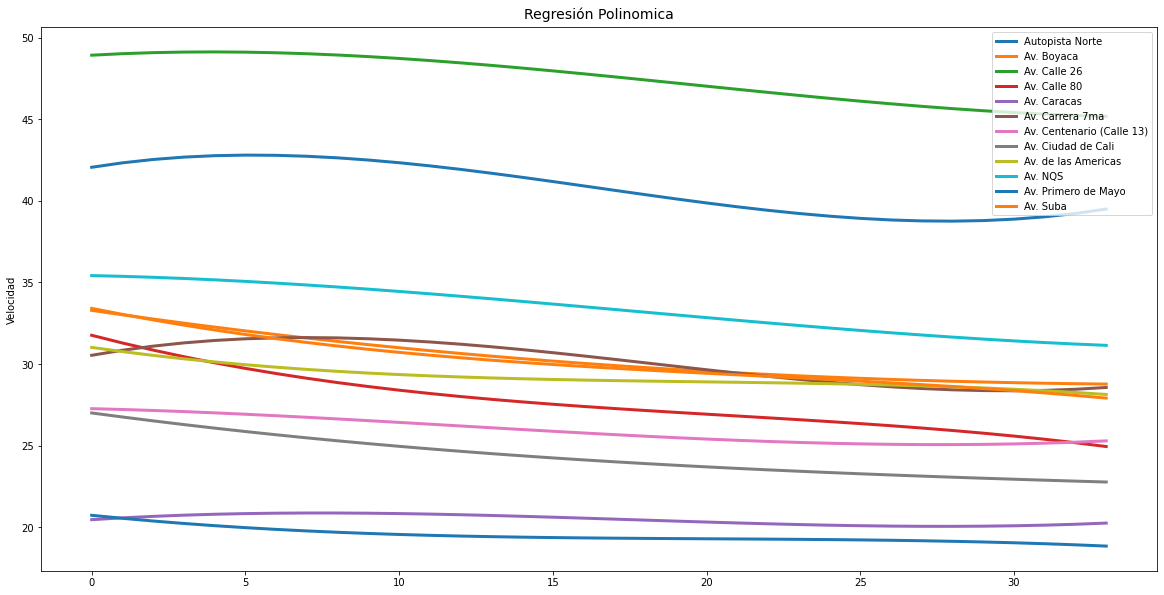

In [14]:
plt.figure(figsize=(20,10))
for i in range(0, len(y_predT)):
  plt.plot(x[:len(y)], y_predT[i], linewidth=3, label=corredor[i])

plt.ylabel("Velocidad");  
plt.title("Regresión Polinomica", fontsize=14, verticalalignment='bottom')
plt.legend()

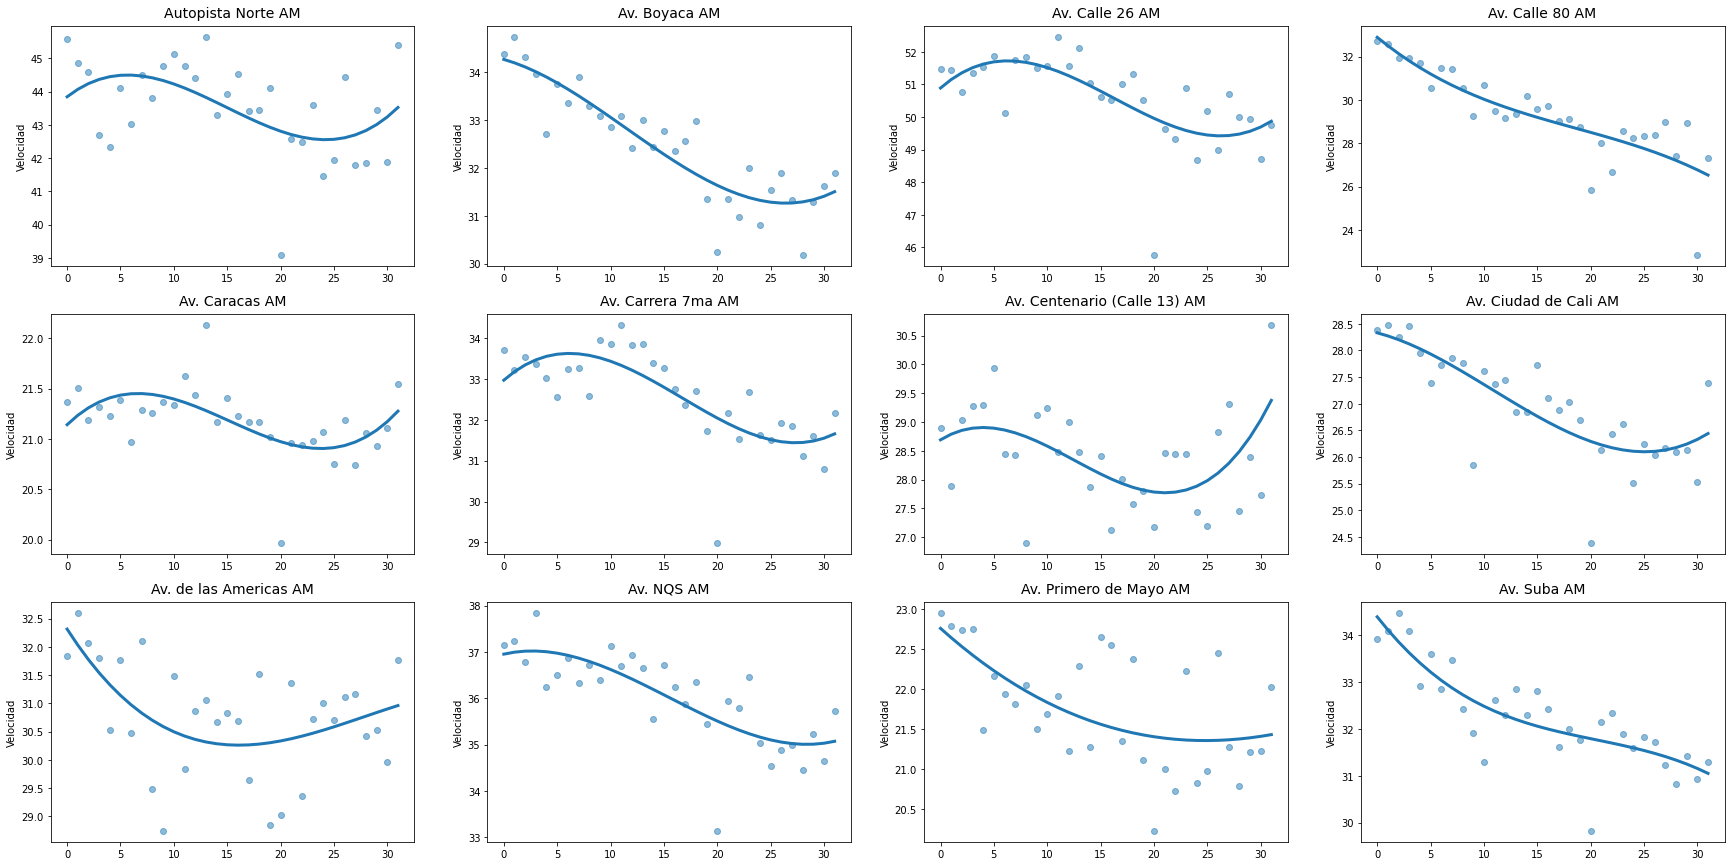

In [15]:
dfAM = dfF.loc[dfF["Jornada"] == "AM"]
plt.figure(figsize=(30,15))
y_predAM = []
i = 1
for cor in corredor:
  dfC = dfAM.loc[dfAM["Corredor"] == cor]
  df2 = dfC.groupby("Fecha", as_index=False).mean()["Velocidad"]
  y = df2.values  
  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x[:len(y)])  
  xp = transformer.transform(x[:len(y)])
  model = LinearRegression().fit(xp, y)
  y_pred = model.predict(xp)
  y_predAM.append(y_pred)
  plt.subplot(3,4,i)
  i = i + 1
  plt.scatter(x[:len(y)], y, alpha=0.5)
  plt.plot(x[:len(y)], y_pred, linewidth=3)
  plt.ylabel("Velocidad");
  plt.title(cor + " AM", fontsize=14, verticalalignment='bottom')

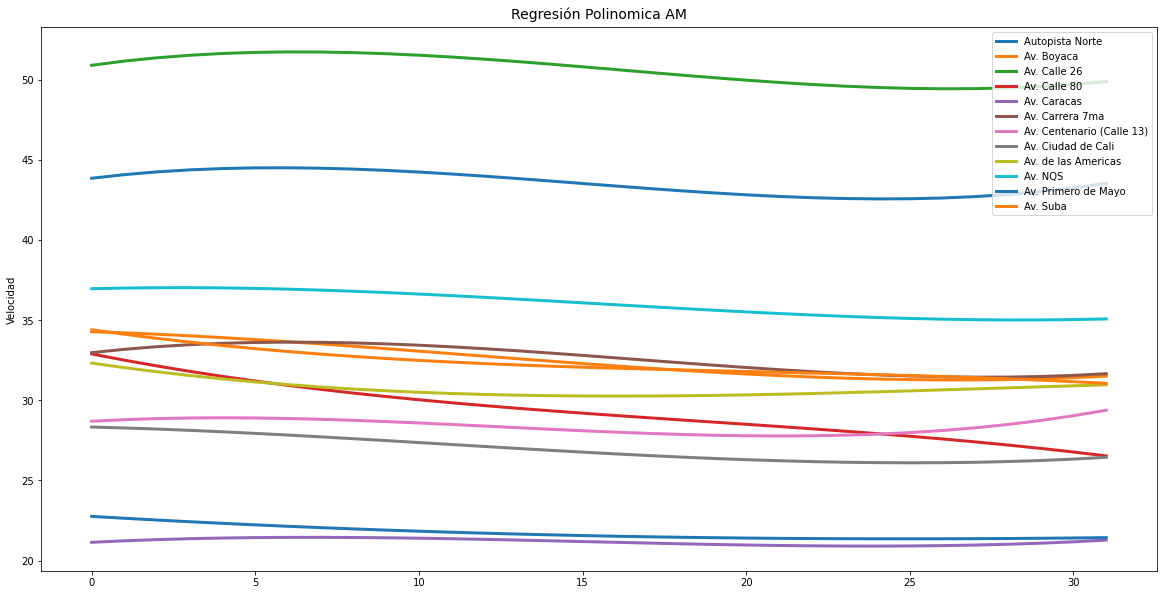

In [16]:
plt.figure(figsize=(20,10))
for i in range(0, len(y_predAM)):
  plt.plot(x[:len(y)], y_predAM[i], linewidth=3, label=corredor[i])

plt.ylabel("Velocidad");  
plt.title("Regresión Polinomica AM", fontsize=14, verticalalignment='bottom')
plt.legend()

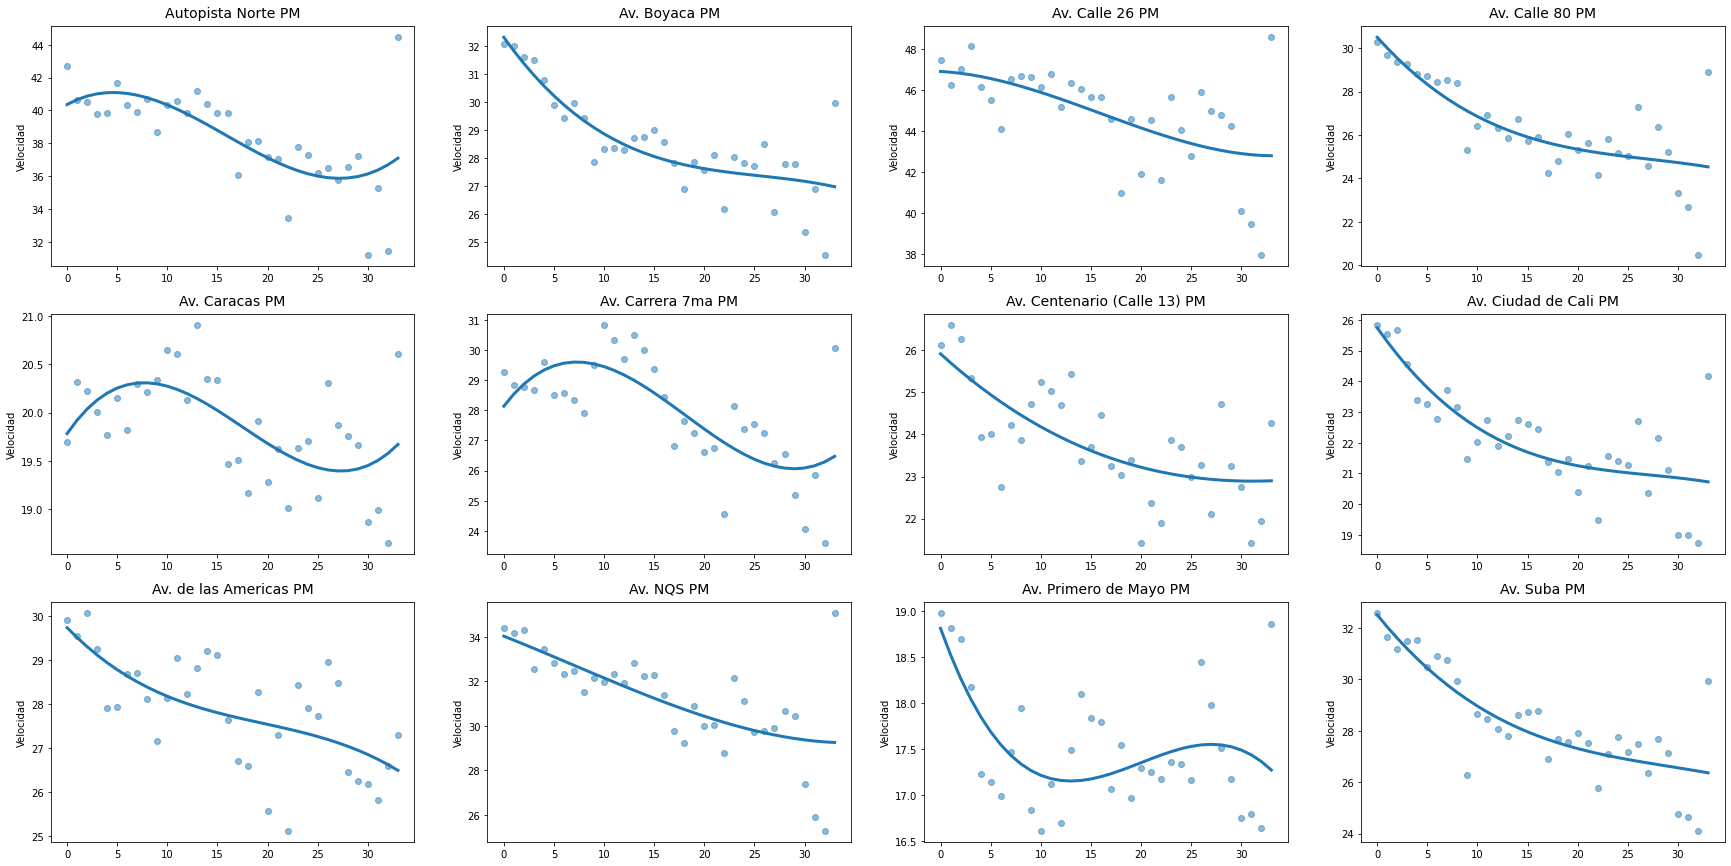

In [17]:
dfPM = dfF.loc[dfF["Jornada"] == "PM"]
plt.figure(figsize=(30,15))
y_predPM = []
i = 1
for cor in corredor:
  dfC = dfPM.loc[dfPM["Corredor"] == cor]
  df2 = dfC.groupby("Fecha", as_index=False).mean()["Velocidad"]
  y = df2.values    
  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x[:len(y)])  
  xp = transformer.transform(x[:len(y)])
  model = LinearRegression().fit(xp, y)
  y_pred = model.predict(xp)
  y_predPM.append(y_pred)
  plt.subplot(3,4,i)
  i = i + 1
  plt.scatter(x[:len(y)], y, alpha=0.5)
  plt.plot(x[:len(y)], y_pred, linewidth=3)
  plt.ylabel("Velocidad");
  plt.title(cor + " PM", fontsize=14, verticalalignment='bottom')

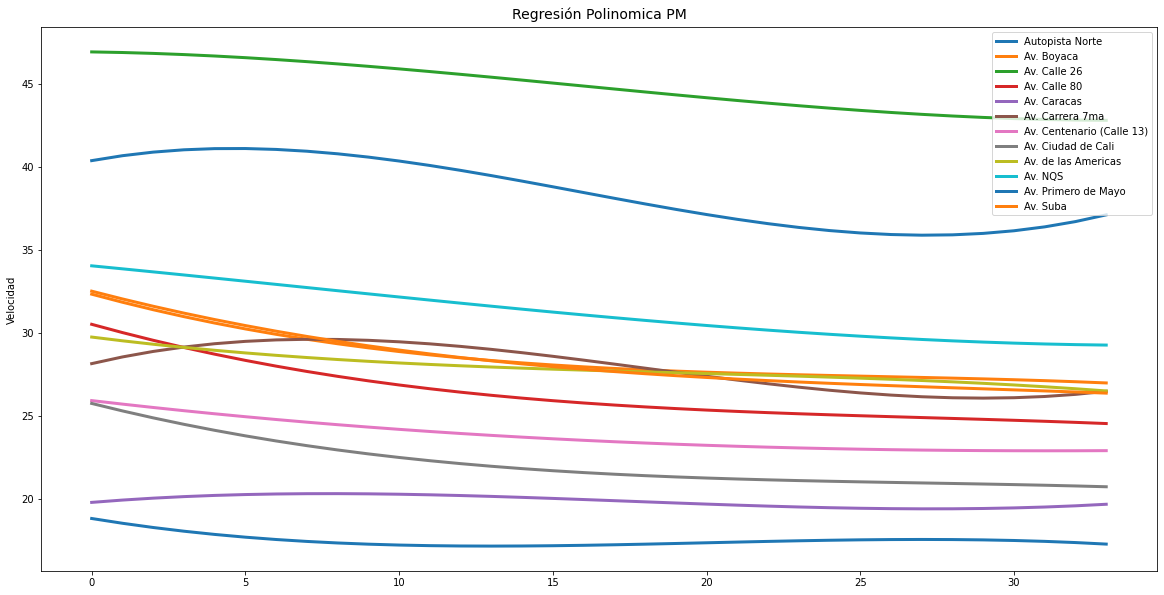

In [18]:
plt.figure(figsize=(20,10))
for i in range(0, len(y_predPM)):
  plt.plot(x[:len(y)], y_predPM[i], linewidth=3, label=corredor[i])

plt.ylabel("Velocidad");  
plt.title("Regresión Polinomica PM", fontsize=14, verticalalignment='bottom')
plt.legend()

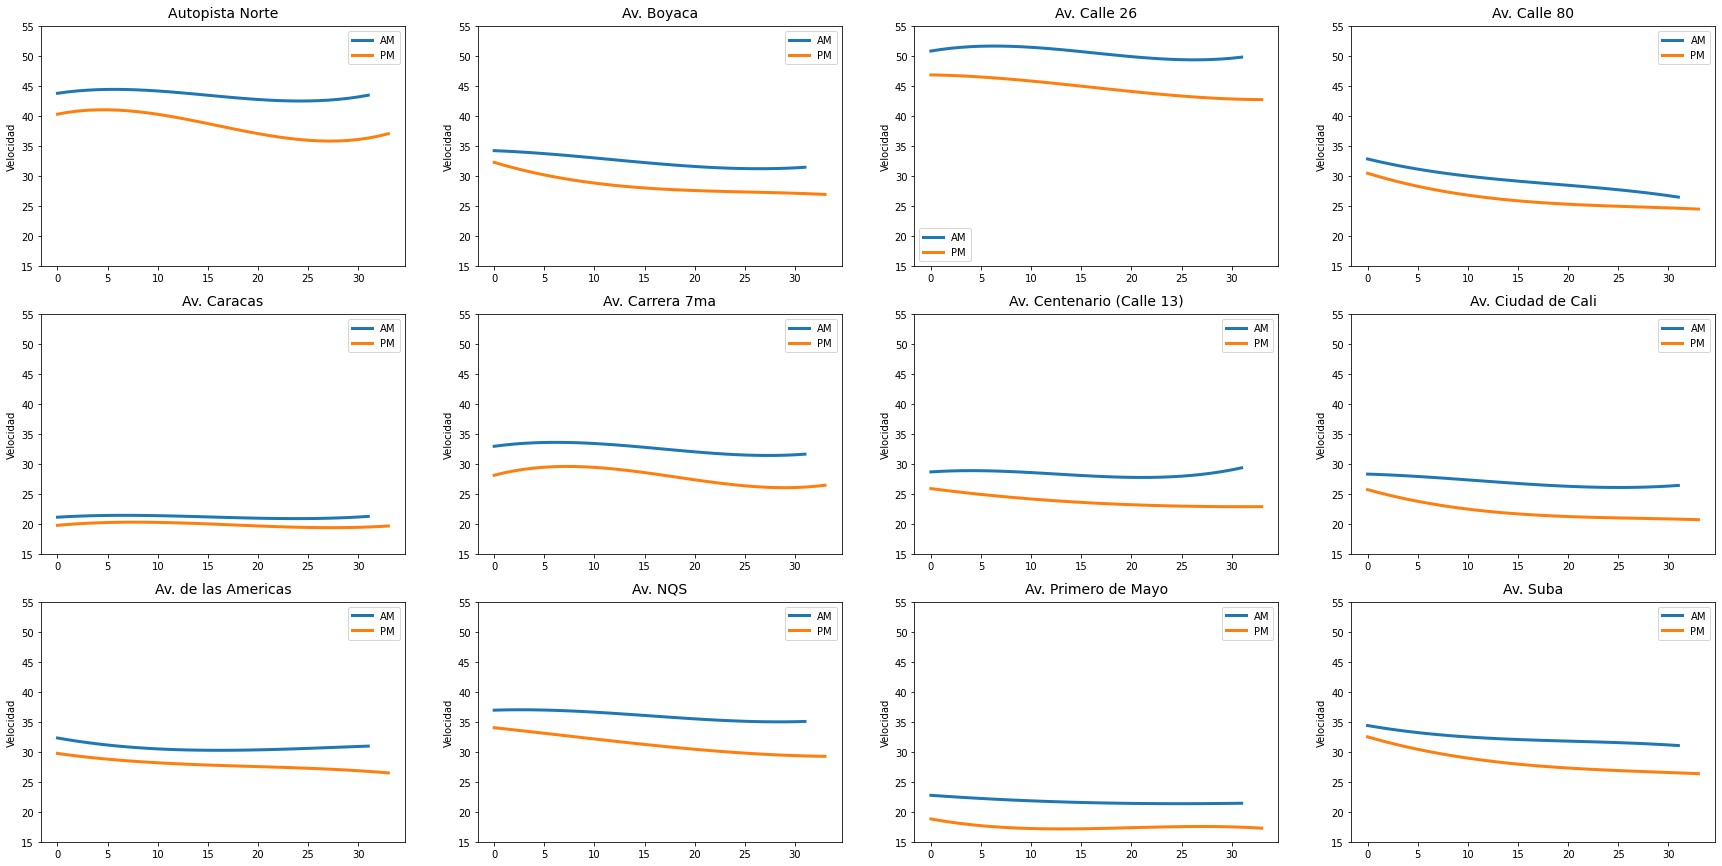

In [19]:
plt.figure(figsize=(30,15))
for i in range(0, len(corredor)):
  plt.subplot(3,4,i+1)
  plt.ylim(15, 55)
  plt.plot(x[:len(y_predAM[i])], y_predAM[i], linewidth=3, label="AM")
  plt.plot(x[:len(y_predPM[i])], y_predPM[i], linewidth=3, label="PM")
  plt.ylabel("Velocidad");  
  plt.title(corredor[i], fontsize=14, verticalalignment='bottom')
  plt.legend()
  i = i + 1  

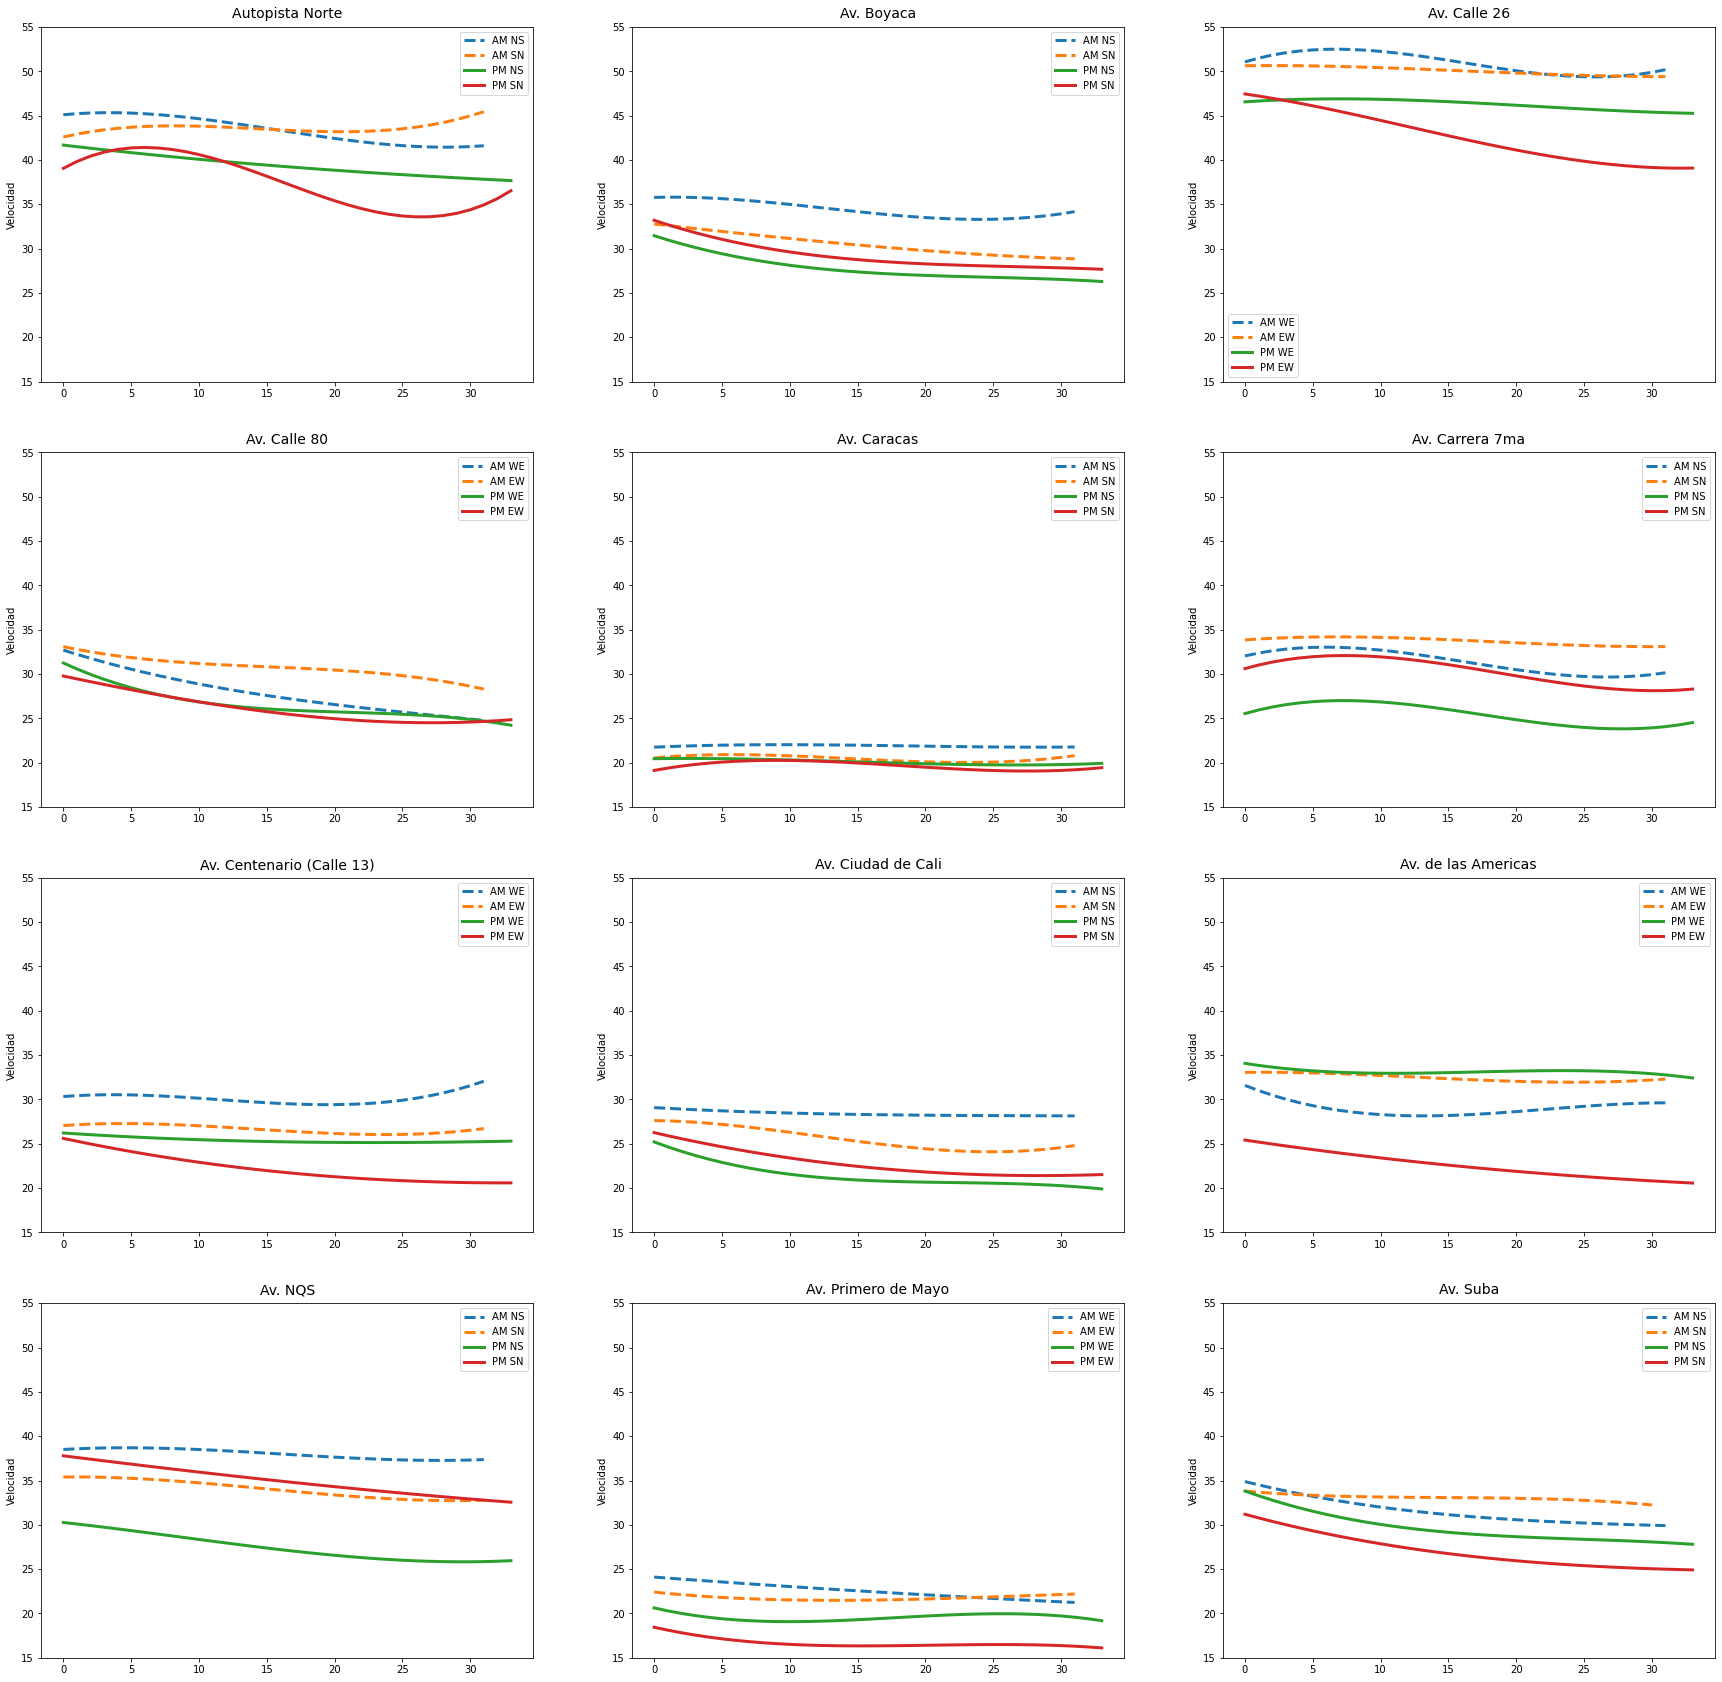

In [20]:
resSPP = []
labelSPP = []
dfAMEW = dfAM.loc[dfAM["Sentido"] == "EW"]
dfAMWE = dfAM.loc[dfAM["Sentido"] == "WE"]
dfAMNS = dfAM.loc[dfAM["Sentido"] == "NS"]
dfAMSN = dfAM.loc[dfAM["Sentido"] == "SN"]

dfPMEW = dfPM.loc[dfPM["Sentido"] == "EW"]
dfPMWE = dfPM.loc[dfPM["Sentido"] == "WE"]
dfPMNS = dfPM.loc[dfPM["Sentido"] == "NS"]
dfPMSN = dfPM.loc[dfPM["Sentido"] == "SN"]

orientacion = {"Autopista Norte" : "L", "Av. Boyaca" : "L", "Av. Calle 26" : "A", "Av. Calle 80" : "A", "Av. Caracas" : "L", "Av. Carrera 7ma" : "L", 
            "Av. Centenario (Calle 13)" : "A", "Av. Ciudad de Cali" : "L", "Av. de las Americas" : "A", "Av. NQS" : "L", "Av. Primero de Mayo" : "A", "Av. Suba" : "L"}

plt.figure(figsize=(30,30))
i = 1
for cor in corredor:
  if orientacion[cor] == "L":
    df1 = dfAMNS.loc[dfAMNS["Corredor"] == cor]
    df2 = dfAMSN.loc[dfAMSN["Corredor"] == cor]
    df3 = dfPMNS.loc[dfPMNS["Corredor"] == cor]
    df4 = dfPMSN.loc[dfPMSN["Corredor"] == cor]
    label1 = "AM NS"
    label2 = "AM SN"
    label3 = "PM NS"
    label4 = "PM SN"    
  else:
    df1 = dfAMWE.loc[dfAMWE["Corredor"] == cor]
    df2 = dfAMEW.loc[dfAMEW["Corredor"] == cor]
    df3 = dfPMWE.loc[dfPMWE["Corredor"] == cor]
    df4 = dfPMEW.loc[dfPMEW["Corredor"] == cor]
    label1 = "AM WE"
    label2 = "AM EW"
    label3 = "PM WE"
    label4 = "PM EW"

  labelSPP.append([label1, label2, label3, label4])

  df1_ = df1.groupby("Fecha", as_index=False).mean()["Velocidad"]
  df2_ = df2.groupby("Fecha", as_index=False).mean()["Velocidad"]
  df3_ = df3.groupby("Fecha", as_index=False).mean()["Velocidad"]
  df4_ = df4.groupby("Fecha", as_index=False).mean()["Velocidad"]

  y1 = df1_.values    
  y2 = df2_.values    
  y3 = df3_.values    
  y4 = df4_.values

  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x[:len(y1)])  
  xp = transformer.transform(x[:len(y1)])
  model = LinearRegression().fit(xp, y1)
  y_pred1 = model.predict(xp)
  
  transformer.fit(x[:len(y2)])  
  xp = transformer.transform(x[:len(y2)])
  model = LinearRegression().fit(xp, y2)
  y_pred2 = model.predict(xp)
  
  transformer.fit(x[:len(y3)])  
  xp = transformer.transform(x[:len(y3)])
  model = LinearRegression().fit(xp, y3)
  y_pred3 = model.predict(xp)

  transformer.fit(x[:len(y4)])  
  xp = transformer.transform(x[:len(y4)])
  model = LinearRegression().fit(xp, y4)
  y_pred4 = model.predict(xp)

  resSPP.append([y_pred1, y_pred2, y_pred3, y_pred4])

  plt.subplot(4,3,i)
  plt.ylim(15, 55)
  plt.plot(x[:len(y_pred1)], y_pred1, linewidth=3, label=label1, linestyle='dashed')
  plt.plot(x[:len(y_pred2)], y_pred2, linewidth=3, label=label2, linestyle='dashed')
  plt.plot(x[:len(y_pred3)], y_pred3, linewidth=3, label=label3)
  plt.plot(x[:len(y_pred4)], y_pred4, linewidth=3, label=label4)

  plt.ylabel("Velocidad");  
  plt.title(cor, fontsize=14, verticalalignment='bottom')
  plt.legend()
  i = i + 1  

plt.savefig('No PP.png')



---

<h1>PICO Y PLACA</h1>

---



In [21]:
df = pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/pico_placa_oct_HF.csv', sep=";")

In [22]:
dfM = df.merge(df_tipo_dia, left_on='Fecha', right_on='Fecha')
dfM.head()

,Jornada,Corredor,tid,Tramo,Sentido,Volumen,Fecha,Velocidad,Nombredia,Tipodia
0,AM,Autopista Norte,1000035,AUTONORTE - CL80CL82,SN,91,2020-10-01,22.295273,Jueves,Habil
1,AM,Autopista Norte,1000036,AUTONORTE - CL82CL80,NS,30,2020-10-01,28.030331,Jueves,Habil
2,AM,Autopista Norte,1001992,AUTONORTE - CL82VIRREY,SN,142,2020-10-01,29.534513,Jueves,Habil
3,AM,Autopista Norte,1001993,AUTONORTE - VIRREYCL82,NS,58,2020-10-01,45.021639,Jueves,Habil
4,AM,Autopista Norte,1001994,AUTONORTE - VIRREYCL100,SN,98,2020-10-01,35.274929,Jueves,Habil


In [23]:
dfF = dfM.loc[dfM["Tipodia"] == 'Habil']
dfF = dfF_.append(dfF)
dfF.head()

,Jornada,Corredor,tid,Tramo,Sentido,Volumen,Fecha,Velocidad,Nombredia,Tipodia
23880,PM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,358,2020-09-22,41.097022,Martes,Habil
23881,AM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,188,2020-09-22,49.079300,Martes,Habil
23882,PM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,83,2020-09-22,39.054504,Martes,Habil
23883,AM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,55,2020-09-22,41.961937,Martes,Habil
23884,PM,Autopista Norte,1002021,AUTONORTE - CARDIO.INFANTILCL146,NS,301,2020-09-22,49.721962,Martes,Habil


In [24]:
dfF["Fecha"] = dfF["Fecha"].astype("datetime64")
dfF["Velocidad"] = dfF["Velocidad"].astype("float64")
dfF["Jornada"] = dfF["Jornada"].astype("str")
dfF.dtypes

Jornada              object
Corredor             object
tid                   int64
Tramo                object
Sentido              object
Volumen               int64
Fecha        datetime64[ns]
Velocidad           float64
Nombredia            object
Tipodia              object
dtype: object

In [25]:
df2 = dfF.groupby("Fecha", as_index=False).mean()["Velocidad"]
df2

0     29.930013
1     28.343315
2     30.025288
3     29.156075
4     30.560225
5     29.615566
6     29.311010
7     29.089998
8     28.844373
9     29.653171
10    29.606930
11    29.166342
12    29.346863
13    28.849124
14    29.117579
15    29.310435
16    28.833736
17    28.077793
18    29.703123
19    28.849376
20    30.415530
21    28.441399
22    28.249435
23    29.740386
24    28.009624
25    28.961673
26    28.944924
27    28.299688
Name: Velocidad, dtype: float64

In [26]:
pol_degree = 3
x = df2.index.values.reshape(-1,1)
xCPP = x
y = df2.values
transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
transformer.fit(x)
xp = transformer.transform(x)
model = LinearRegression().fit(xp, y)
print('Coefficient of determination:', model.score(xp, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
y_pred = model.predict(xp)
print('Predicted response:', y_pred, sep='\n')

Coefficient of determination: 0.17841504005729425
Intercept: 29.56948896702094
Coefficients: [-2.93321619e-02  5.13977232e-04 -2.77637884e-05]
Predicted response:
[29.56948897 29.54064302 29.51265844 29.48536865 29.45860707 29.43220711
 29.4060022  29.37982574 29.35351115 29.32689186 29.29980128 29.27207283
 29.24353992 29.21403597 29.1833944  29.15144863 29.11803207 29.08297814
 29.04612026 29.00729185 28.96632631 28.92305708 28.87731757 28.82894119
 28.77776136 28.7236115  28.66632502 28.60573535]


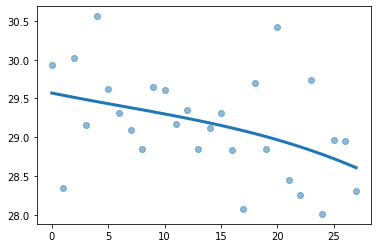

In [27]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred, linewidth=3)
plt.show()

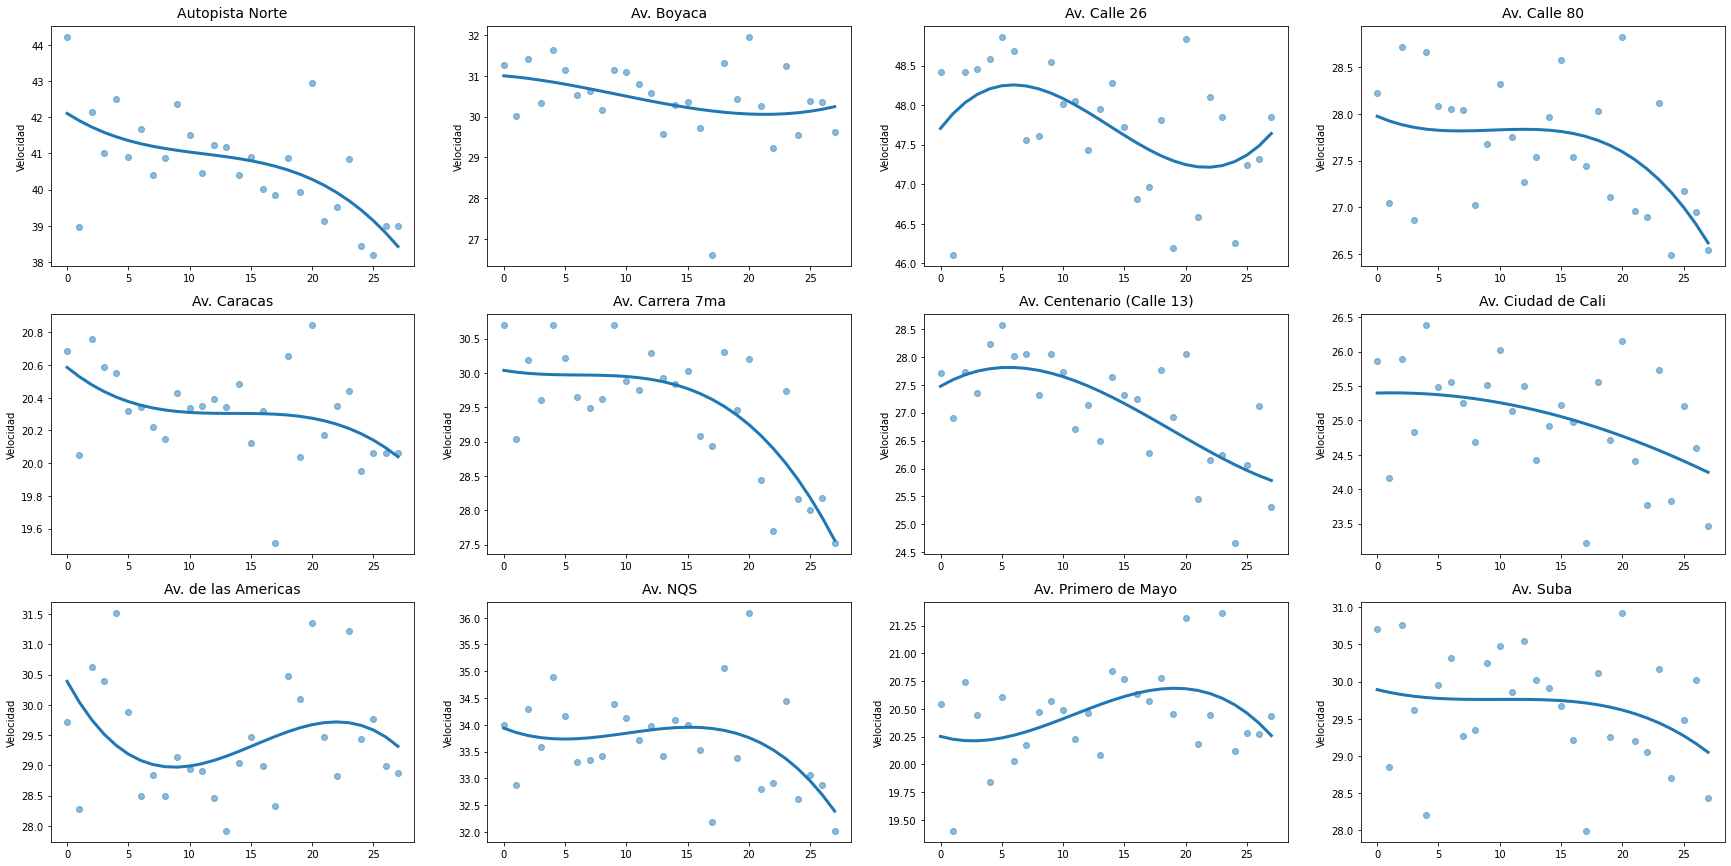

In [28]:
corredor = ["Autopista Norte", "Av. Boyaca", "Av. Calle 26", "Av. Calle 80", "Av. Caracas", "Av. Carrera 7ma", 
            "Av. Centenario (Calle 13)", "Av. Ciudad de Cali", "Av. de las Americas", "Av. NQS", "Av. Primero de Mayo", "Av. Suba"]
plt.figure(figsize=(30,15))
y_predT = []
i = 1
for cor in corredor:
  dfC = dfF.loc[dfF["Corredor"] == cor]
  df2 = dfC.groupby("Fecha", as_index=False).mean()["Velocidad"]
  y = df2.values
  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x[:len(y)])
  xp = transformer.transform(x[:len(y)])
  model = LinearRegression().fit(xp, y)
  y_pred = model.predict(xp)
  y_predT.append(y_pred)
  plt.subplot(3,4,i)
  i = i + 1
  plt.scatter(x[:len(y)], y, alpha=0.5)
  plt.plot(x[:len(y)], y_pred, linewidth=3)
  plt.ylabel("Velocidad");
  plt.title(cor, fontsize=14, verticalalignment='bottom')

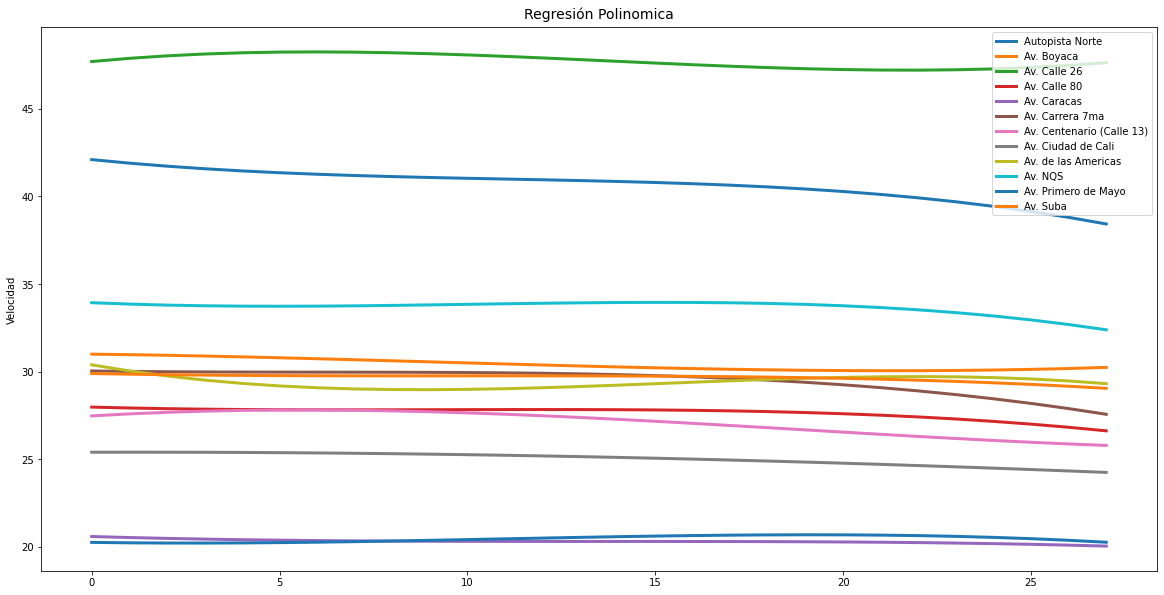

In [29]:
plt.figure(figsize=(20,10))
for i in range(0, len(y_predT)):
  plt.plot(x[:len(y)], y_predT[i], linewidth=3, label=corredor[i])

plt.ylabel("Velocidad");  
plt.title("Regresión Polinomica", fontsize=14, verticalalignment='bottom')
plt.legend()

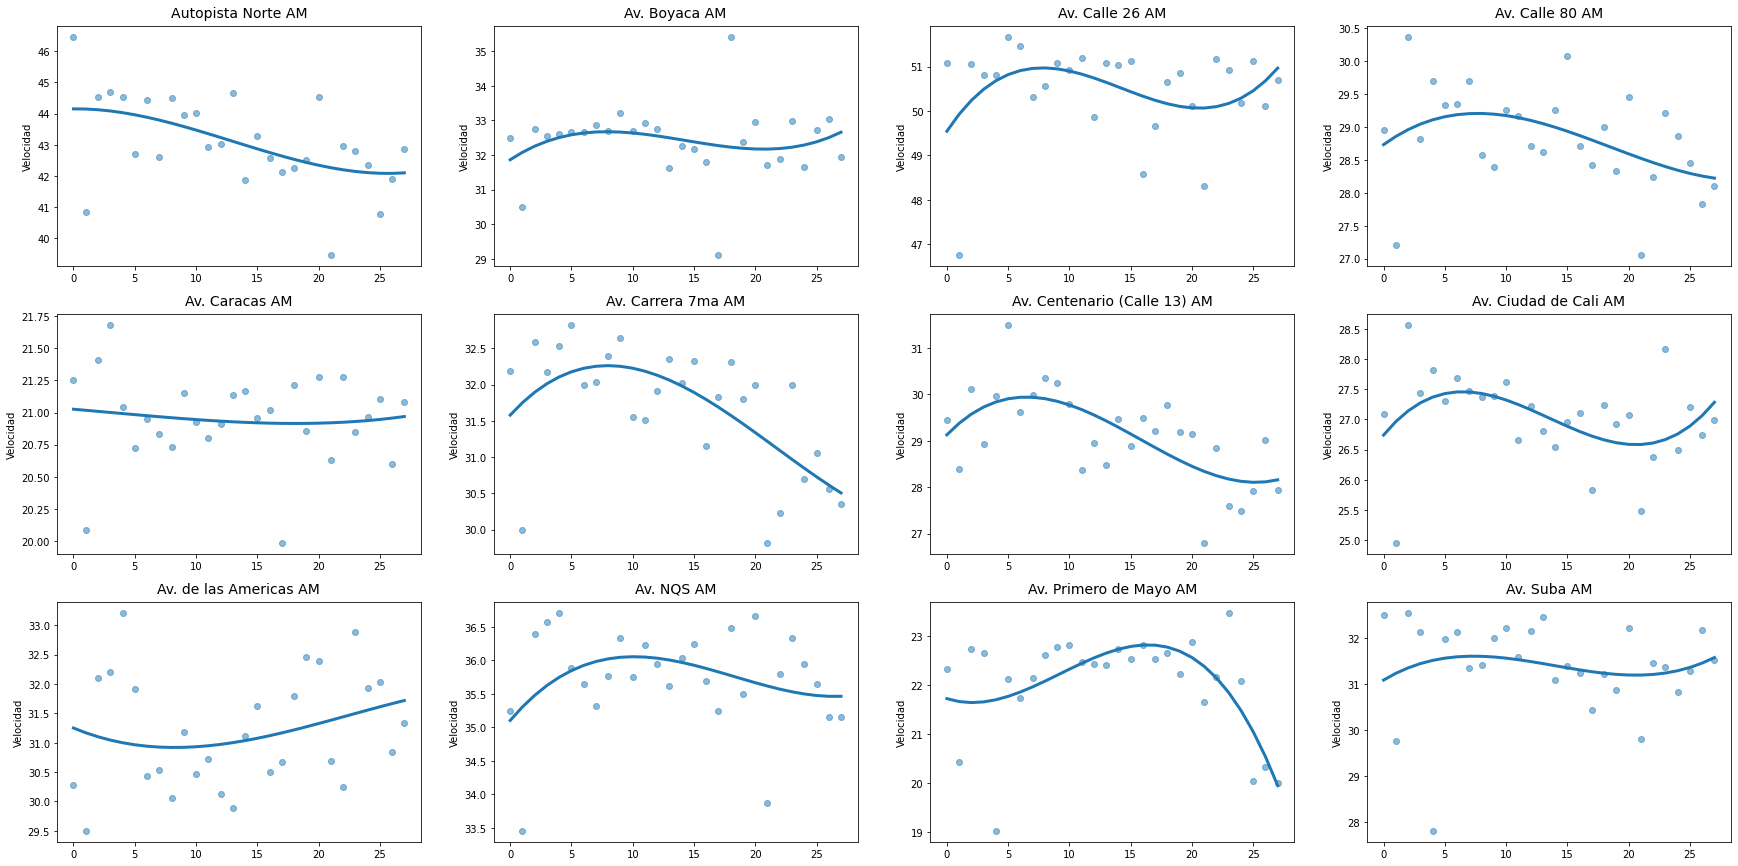

In [30]:
dfAM = dfF.loc[dfF["Jornada"] == "AM"]
plt.figure(figsize=(30,15))
y_predAM = []
i = 1
for cor in corredor:
  dfC = dfAM.loc[dfAM["Corredor"] == cor]
  df2 = dfC.groupby("Fecha", as_index=False).mean()["Velocidad"]
  y = df2.values  
  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x[:len(y)])  
  xp = transformer.transform(x[:len(y)])
  model = LinearRegression().fit(xp, y)
  y_pred = model.predict(xp)
  y_predAM.append(y_pred)
  plt.subplot(3,4,i)
  i = i + 1
  plt.scatter(x[:len(y)], y, alpha=0.5)
  plt.plot(x[:len(y)], y_pred, linewidth=3)
  plt.ylabel("Velocidad");
  plt.title(cor + " AM", fontsize=14, verticalalignment='bottom')

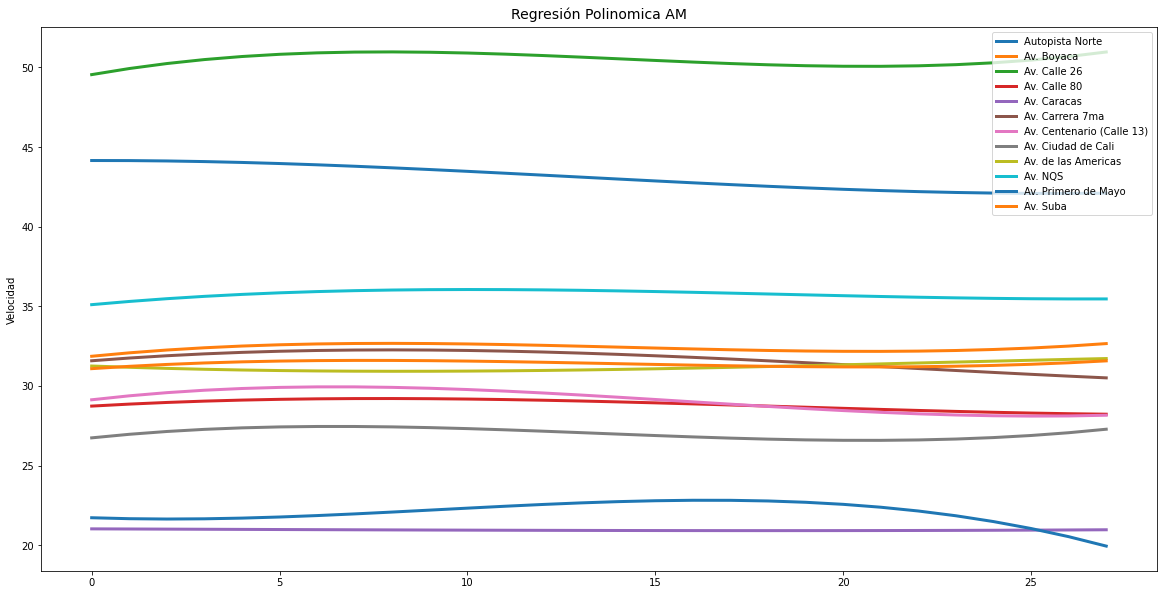

In [31]:
plt.figure(figsize=(20,10))
for i in range(0, len(y_predAM)):
  plt.plot(x[:len(y)], y_predAM[i], linewidth=3, label=corredor[i])

plt.ylabel("Velocidad");  
plt.title("Regresión Polinomica AM", fontsize=14, verticalalignment='bottom')
plt.legend()

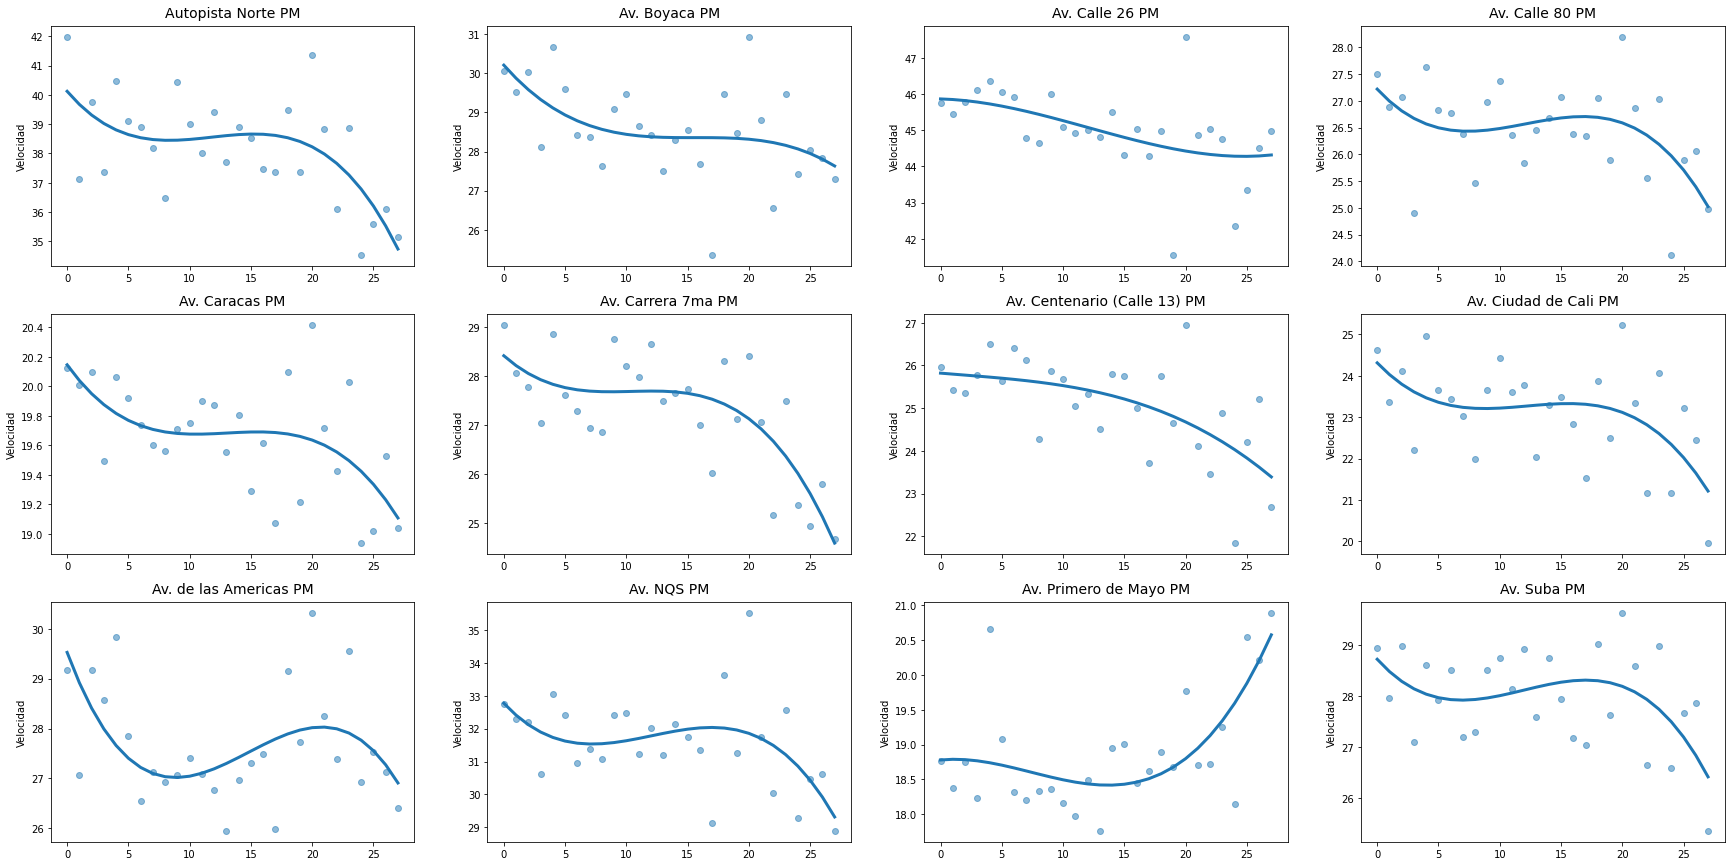

In [32]:
dfPM = dfF.loc[dfF["Jornada"] == "PM"]
plt.figure(figsize=(30,15))
y_predPM = []
i = 1
for cor in corredor:
  dfC = dfPM.loc[dfPM["Corredor"] == cor]
  df2 = dfC.groupby("Fecha", as_index=False).mean()["Velocidad"]
  y = df2.values    
  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x[:len(y)])  
  xp = transformer.transform(x[:len(y)])
  model = LinearRegression().fit(xp, y)
  y_pred = model.predict(xp)
  y_predPM.append(y_pred)
  plt.subplot(3,4,i)
  i = i + 1
  plt.scatter(x[:len(y)], y, alpha=0.5)
  plt.plot(x[:len(y)], y_pred, linewidth=3)
  plt.ylabel("Velocidad");
  plt.title(cor + " PM", fontsize=14, verticalalignment='bottom')

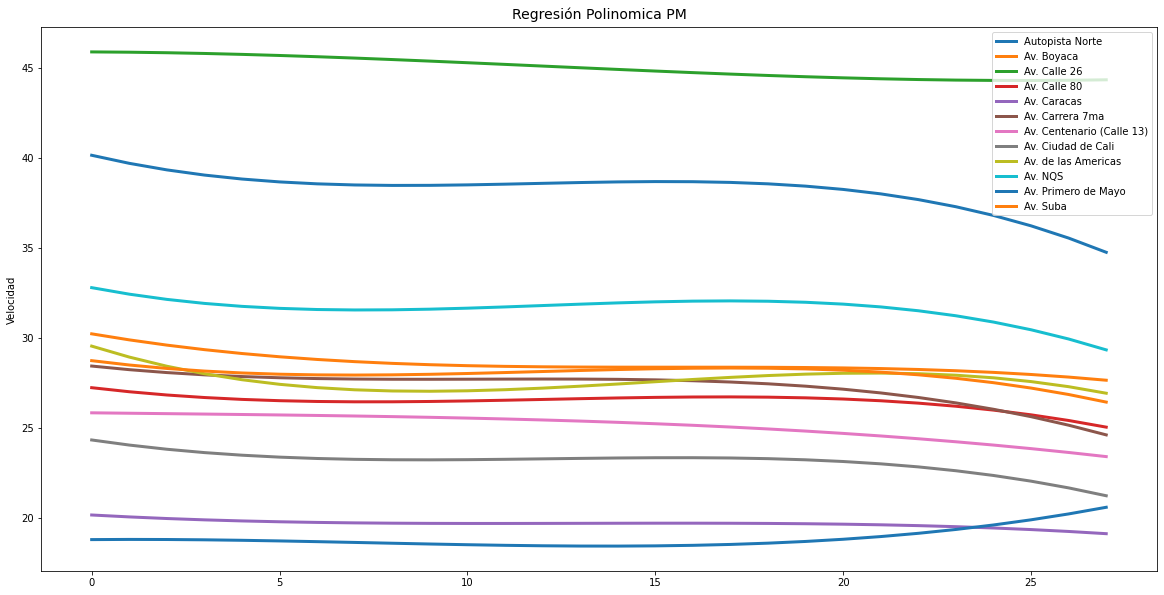

In [33]:
plt.figure(figsize=(20,10))
for i in range(0, len(y_predPM)):
  plt.plot(x[:len(y)], y_predPM[i], linewidth=3, label=corredor[i])

plt.ylabel("Velocidad");  
plt.title("Regresión Polinomica PM", fontsize=14, verticalalignment='bottom')
plt.legend()

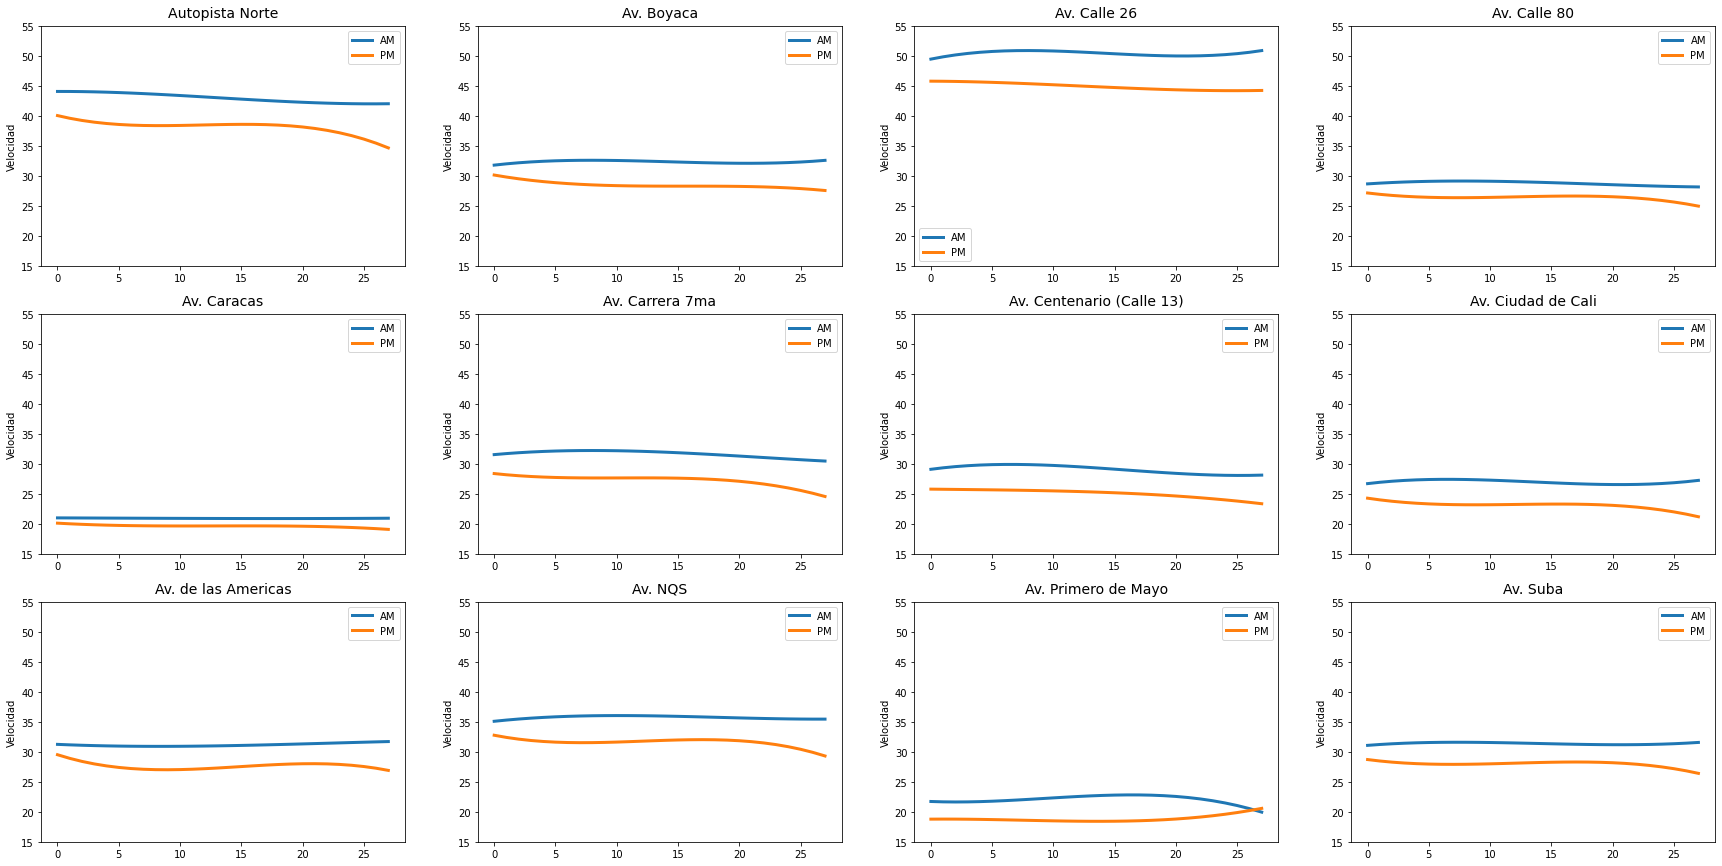

In [34]:
plt.figure(figsize=(30,15))
for i in range(0, len(corredor)):
  plt.subplot(3,4,i+1)
  plt.ylim(15, 55)
  plt.plot(x[:len(y_predAM[i])], y_predAM[i], linewidth=3, label="AM")
  plt.plot(x[:len(y_predPM[i])], y_predPM[i], linewidth=3, label="PM")
  plt.ylabel("Velocidad");  
  plt.title(corredor[i], fontsize=14, verticalalignment='bottom')
  plt.legend()
  i = i + 1  

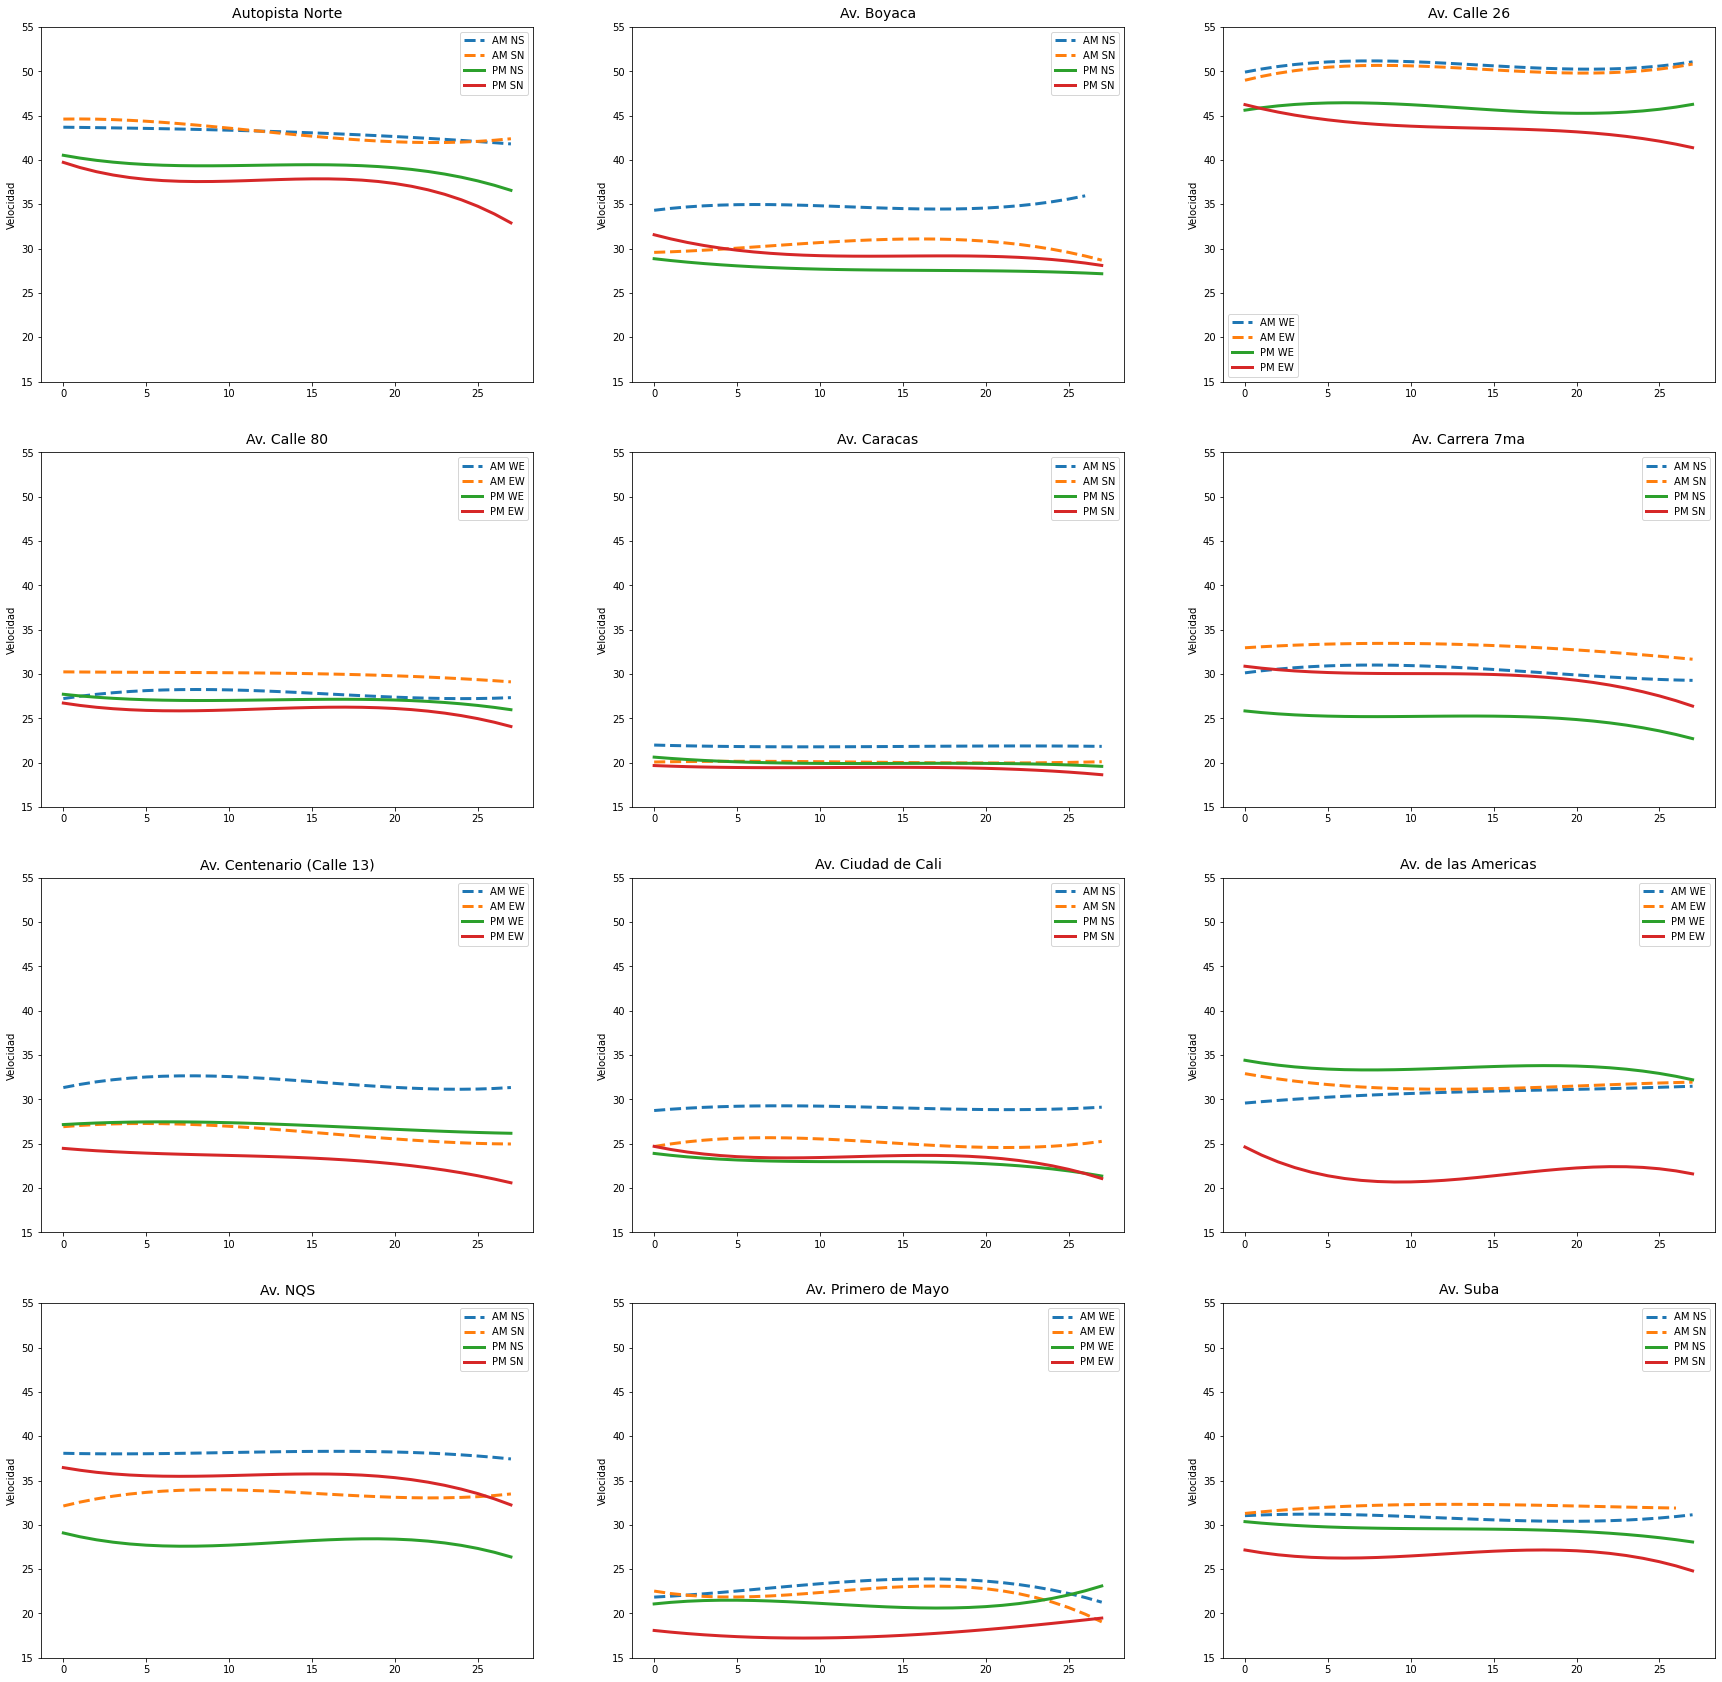

In [35]:
resCPP = []
labelCPP = []
dfAMEW = dfAM.loc[dfAM["Sentido"] == "EW"]
dfAMWE = dfAM.loc[dfAM["Sentido"] == "WE"]
dfAMNS = dfAM.loc[dfAM["Sentido"] == "NS"]
dfAMSN = dfAM.loc[dfAM["Sentido"] == "SN"]

dfPMEW = dfPM.loc[dfPM["Sentido"] == "EW"]
dfPMWE = dfPM.loc[dfPM["Sentido"] == "WE"]
dfPMNS = dfPM.loc[dfPM["Sentido"] == "NS"]
dfPMSN = dfPM.loc[dfPM["Sentido"] == "SN"]

orientacion = {"Autopista Norte" : "L", "Av. Boyaca" : "L", "Av. Calle 26" : "A", "Av. Calle 80" : "A", "Av. Caracas" : "L", "Av. Carrera 7ma" : "L", 
            "Av. Centenario (Calle 13)" : "A", "Av. Ciudad de Cali" : "L", "Av. de las Americas" : "A", "Av. NQS" : "L", "Av. Primero de Mayo" : "A", "Av. Suba" : "L"}

plt.figure(figsize=(30,30))
i = 1
for cor in corredor:
  if orientacion[cor] == "L":
    df1 = dfAMNS.loc[dfAMNS["Corredor"] == cor]
    df2 = dfAMSN.loc[dfAMSN["Corredor"] == cor]
    df3 = dfPMNS.loc[dfPMNS["Corredor"] == cor]
    df4 = dfPMSN.loc[dfPMSN["Corredor"] == cor]
    label1 = "AM NS"
    label2 = "AM SN"
    label3 = "PM NS"
    label4 = "PM SN"    
  else:
    df1 = dfAMWE.loc[dfAMWE["Corredor"] == cor]
    df2 = dfAMEW.loc[dfAMEW["Corredor"] == cor]
    df3 = dfPMWE.loc[dfPMWE["Corredor"] == cor]
    df4 = dfPMEW.loc[dfPMEW["Corredor"] == cor]
    label1 = "AM WE"
    label2 = "AM EW"
    label3 = "PM WE"
    label4 = "PM EW"

  labelCPP.append([label1, label2, label3, label4])

  df1_ = df1.groupby("Fecha", as_index=False).mean()["Velocidad"]
  df2_ = df2.groupby("Fecha", as_index=False).mean()["Velocidad"]
  df3_ = df3.groupby("Fecha", as_index=False).mean()["Velocidad"]
  df4_ = df4.groupby("Fecha", as_index=False).mean()["Velocidad"]

  y1 = df1_.values    
  y2 = df2_.values    
  y3 = df3_.values    
  y4 = df4_.values        

  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x[:len(y1)])  
  xp = transformer.transform(x[:len(y1)])
  model = LinearRegression().fit(xp, y1)
  y_pred1 = model.predict(xp)
  
  transformer.fit(x[:len(y2)])  
  xp = transformer.transform(x[:len(y2)])
  model = LinearRegression().fit(xp, y2)
  y_pred2 = model.predict(xp)
  
  transformer.fit(x[:len(y3)])  
  xp = transformer.transform(x[:len(y3)])
  model = LinearRegression().fit(xp, y3)
  y_pred3 = model.predict(xp)

  transformer.fit(x[:len(y4)])  
  xp = transformer.transform(x[:len(y4)])
  model = LinearRegression().fit(xp, y4)
  y_pred4 = model.predict(xp)

  resCPP.append([y_pred1, y_pred2, y_pred3, y_pred4])

  plt.subplot(4,3,i)
  plt.ylim(15, 55)
  plt.plot(x[:len(y_pred1)], y_pred1, linewidth=3, label=label1, linestyle='dashed')
  plt.plot(x[:len(y_pred2)], y_pred2, linewidth=3, label=label2, linestyle='dashed')
  plt.plot(x[:len(y_pred3)], y_pred3, linewidth=3, label=label3)
  plt.plot(x[:len(y_pred4)], y_pred4, linewidth=3, label=label4)

  plt.ylabel("Velocidad");  
  plt.title(cor, fontsize=14, verticalalignment='bottom')
  plt.legend()
  i = i + 1  

plt.savefig('PP.png')

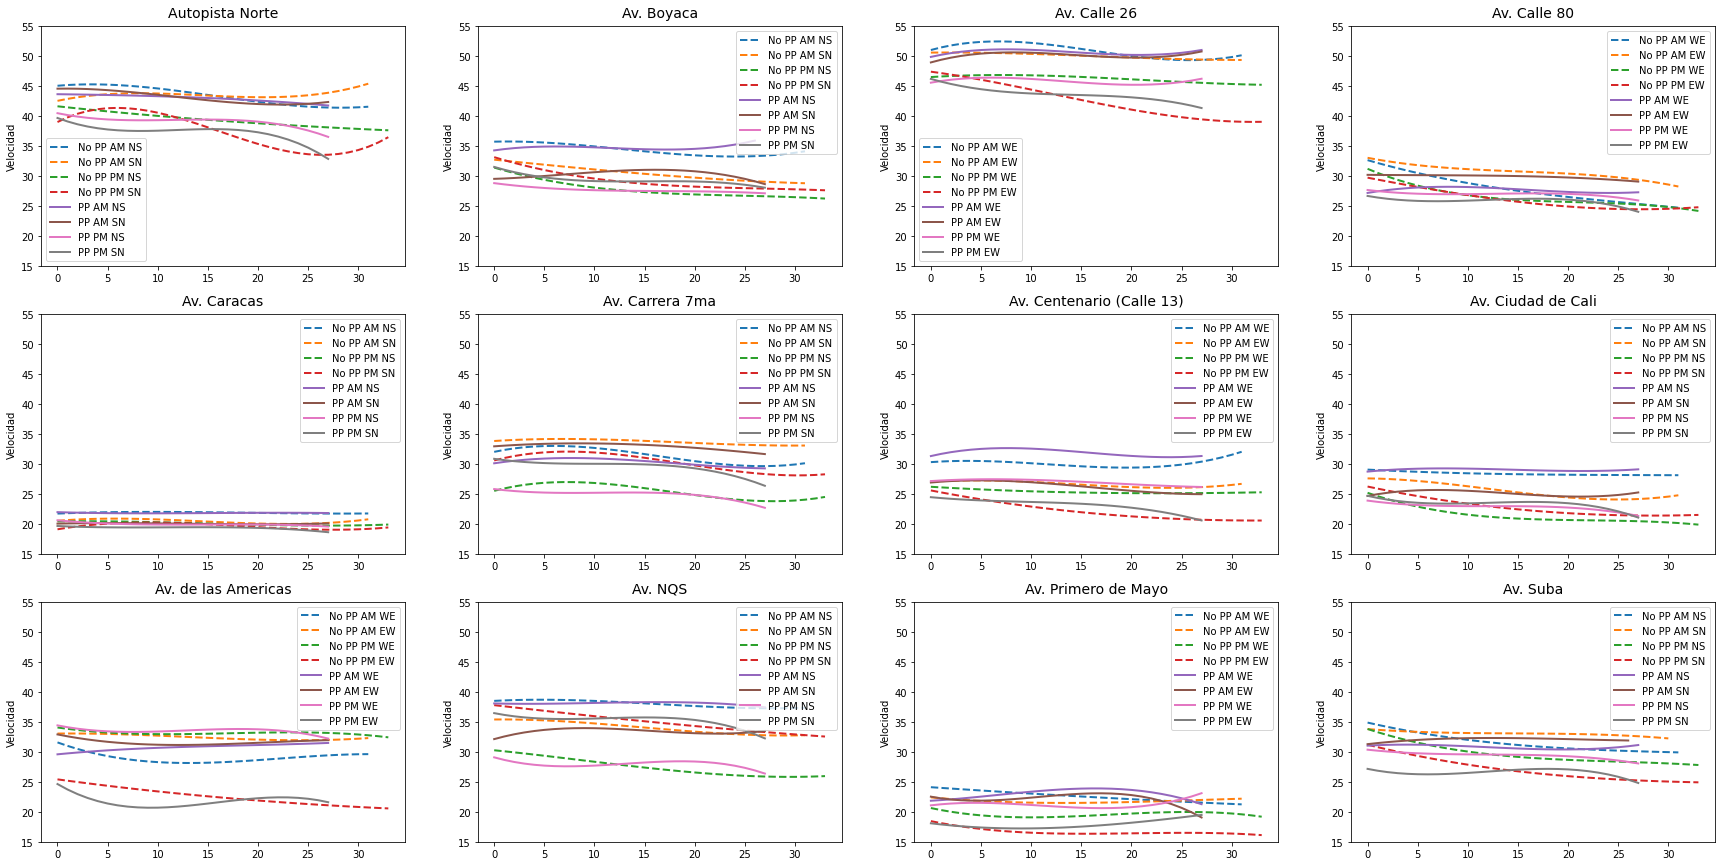

In [36]:
plt.figure(figsize=(30,15))

for i in range (0, len(corredor)):
  plt.subplot(3,4,i+1)
  plt.ylim(15, 55)
  plt.plot(list(range(len(resSPP[i][0]))), resSPP[i][0], linewidth=2, label="No PP " + labelSPP[i][0], linestyle='dashed')
  plt.plot(list(range(len(resSPP[i][1]))), resSPP[i][1], linewidth=2, label="No PP " + labelSPP[i][1], linestyle='dashed')
  plt.plot(list(range(len(resSPP[i][2]))), resSPP[i][2], linewidth=2, label="No PP " + labelSPP[i][2], linestyle='dashed')
  plt.plot(list(range(len(resSPP[i][3]))), resSPP[i][3], linewidth=2, label="No PP " + labelSPP[i][3], linestyle='dashed')

  plt.plot(list(range(len(resCPP[i][0]))), resCPP[i][0], linewidth=2, label="PP " + labelCPP[i][0])
  plt.plot(list(range(len(resCPP[i][1]))), resCPP[i][1], linewidth=2, label="PP " + labelCPP[i][1])
  plt.plot(list(range(len(resCPP[i][2]))), resCPP[i][2], linewidth=2, label="PP " + labelCPP[i][2])
  plt.plot(list(range(len(resCPP[i][3]))), resCPP[i][3], linewidth=2, label="PP " + labelCPP[i][3])

  plt.ylabel("Velocidad");  
  plt.title(corredor[i], fontsize=14, verticalalignment='bottom')
  plt.legend()  